In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Nettoyage des bases de données

In [2]:
df = pd.DataFrame(pd.read_excel(r'C:\Users\arceb\Desktop\Stage\Attrib 2018 MGP - RM positif - MVI pour CBA.xlsx'))

On va commencer par travailler sur la base de donnée des demandeurs pour estimer les différents quartiles de revenus parmis les demandeurs de la base de donnée. On va donc nettoyer la base, et créer une nouvelle colonne dans le dataframe indiquant le quartile auquel appartient le ménage. Cette information va permettre ensuite d'analyser le taux d'attente des demandeurs qui ont reçu un logement dans l'année en fonction de leur quartile d'appartenance.

In [3]:
df

,Unnamed: 0,région,Numéro Unique,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Code département logement actuel,Code INSEE logt actuel,Commune logt actuel,...,Code de la commune attribuée,Région du logement attribué,Type du logement attribué,Est en QPV,Surface du logement attribué,Statut DALO,Date de la décision DALO\n\n,Accompagnement social,Diagnostic social,Réservataire
0,NaN,Ile-de-France,111011885857794043,2018-01-15,2018-06-08,37,Marié (e),94,94043,Le Kremlin-Bicêtre,...,94067,Ile-de-France,T3,Ne sait pas,64,Non renseigné,NaT,Non,Non,Action Logement
1,NaN,Ile-de-France,111051767234510108,2017-05-15,2018-06-01,54,Séparé (e),94,94017,Champigny-sur-Marne,...,94079,Ile-de-France,T3,Non,70,Non renseigné,NaT,Non,Non,Action Logement
2,NaN,Ile-de-France,111091777617075056,2017-09-29,2018-11-26,32,Concubin (e),94,94068,Saint-Maur-des-Fossés,...,93057,Ile-de-France,T2,Non,46,Non renseigné,NaT,Non,Non,Action Logement
3,NaN,Ile-de-France,111021758912175056,2017-02-08,2018-01-03,28,Célibataire,94,94017,Champigny-sur-Marne,...,75117,Ile-de-France,T1,Non,27,Non renseigné,NaT,Non,Non,Contingent préfet fonctionnaires et agents pub...
4,NaN,Ile-de-France,111111781080175056,2017-11-10,2018-04-01,45,Célibataire,75,75104,Paris 4ème arrondissement,...,75104,Ile-de-France,T1,Non,16,Non renseigné,NaT,Non,Non,"Contingent des collectivités territoriales, de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,NaN,Ile-de-France,111011885009910129,2018-01-04,2018-04-24,54,Célibataire,91,91174,Corbeil-Essonnes,...,91687,Ile-de-France,T3,Non,57,Non renseigné,NaT,Non,Non,Contingent préfet fonctionnaires et agents pub...
42744,NaN,Ile-de-France,1111217829952GDPUB,2017-12-03,2018-02-12,33,Marié (e),75,75114,Paris 14ème arrondissement,...,75114,Ile-de-France,T3,Non,71,Non renseigné,NaT,Non,Non,Hors contingent
42745,NaN,Ile-de-France,111111782174292019,2017-11-23,2018-08-07,66,Marié (e),92,92019,Châtenay-Malabry,...,92019,Ile-de-France,T4,Non,81,Non renseigné,NaT,Non,Non,"Contingent des collectivités territoriales, de..."
42746,NaN,Ile-de-France,111091647518710129,2016-09-23,2018-05-25,61,Marié (e),93,93005,Aulnay-sous-Bois,...,93005,Ile-de-France,T3,Oui,64,Non renseigné,NaT,Non,Non,Hors contingent


In [5]:
dfd1=df[[ "Numéro Unique", "Nb unités de consommation du foyer", "Ressources mensuelles du foyer", "Date création demande", "Date de la radiation", "Age demandeur", "Situation familiale", "Type du logement attribué"]]
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1
...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3


In [5]:
dfdx=dfd[[ "Numéro Unique", "Montant AL / APL"]]
dfax=dfa[[ "Numéro Unique", "Montant AL / APL"]]
dfx = dfdx.merge(dfax, on='Numéro Unique', how='inner')

In [6]:
dfx

,Numéro Unique,Montant AL / APL_x,Montant AL / APL_y
0,175037900427000002,0.0,0.0
1,175118000728300002,0.0,0.0
2,175108301617300002,0.0,0.0
3,175128420982700002,0.0,0.0
4,175058909634800002,235.0,235.0
...,...,...,...
60759,1111217905754AL003,0.0,0.0
60760,1111217849606GDPUB,0.0,0.0
60761,1111217849858GDPUB,NaN,NaN
60762,1110118850370GDPUB,0.0,0.0


On ne conserve que les colonnes qui vont nous intéresser dans le cadre de l'étude du taux d'attente.

#### Application des filtres

On convertir en NaN les valeurs qui doivent être filtrées, à savoir:
- les NaN (les valeurs qui ne sont pas renseignées), les revenus qui ne sont pas indiqués
- les revenus qui ne sont pas strictement supérieurs à 0
- les revenus qui sont supérieurs à 10000

In [6]:
dfd1.dropna()

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1
...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3


In [7]:
indexNames = dfd1[ dfd1['Ressources mensuelles du foyer'] < 0 ].index
dfd1.drop(indexNames , inplace=True)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\519414860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1
...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3


In [34]:
indexNames1 = dfd1[ dfd1['Ressources mensuelles du foyer'] > 10000 ].index
dfd1.drop(indexNames1 , inplace=True)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_25580\2081586591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1.drop(indexNames1 , inplace=True)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e)
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e)
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e)
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire
...,...,...,...,...,...,...,...
42695,111031891371492044,1.5,9120,2018-03-19,2018-07-03,33,Marié (e)
42697,111061897945710012,1.5,9800,2018-06-01,2018-06-26,62,Marié (e)
42701,111031897446894B01,1.0,7165,2018-03-05,2018-08-31,40,Célibataire
42705,1110718017084GDPUB,1.0,7450,2018-07-27,2018-10-18,25,Célibataire


In [35]:
dfd1=dfd1.dropna()

In [36]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e)
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e)
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e)
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire
...,...,...,...,...,...,...,...
42695,111031891371492044,1.5,9120,2018-03-19,2018-07-03,33,Marié (e)
42697,111061897945710012,1.5,9800,2018-06-01,2018-06-26,62,Marié (e)
42701,111031897446894B01,1.0,7165,2018-03-05,2018-08-31,40,Célibataire
42705,1110718017084GDPUB,1.0,7450,2018-07-27,2018-10-18,25,Célibataire


dfd1 donne désormais la base de  données filtrée. On va pouvoir déterminer les quartiles de revenus.

#### Détermination des quintiles

On calcule dans un premier temps le revenu par unité de consommation.

In [8]:
UC=dfd1["Nb unités de consommation du foyer"]
revenu=dfd1["Ressources mensuelles du foyer"]
dfd1['revenu_par_UC']=revenu/UC
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2797935456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['revenu_par_UC']=revenu/UC


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000
...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000


Il s'agit désormais de déterminer les quintiles.

In [9]:
dfd1['Revenus annuels']=dfd1['revenu_par_UC']*12 #le *12 est pour le revenu annuel

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\325979235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Revenus annuels']=dfd1['revenu_par_UC']*12 #le *12 est pour le revenu annuel


In [10]:
dfd1['Revenus annuels']

0             6.666667
1             8.000000
2             8.000000
3            12.000000
4            12.000000
             ...      
42743    567312.000000
42744    594426.666667
42745    595656.000000
42746    634764.000000
42747    720542.400000
Name: Revenus annuels, Length: 42748, dtype: float64

In [40]:
dfd1['Revenus annuels'].describe()

count     42694.000000
mean      17101.386676
std        7073.133836
min           6.666667
25%       11992.000000
50%       16259.032258
75%       21156.000000
max      112932.000000
Name: Revenus annuels, dtype: float64

In [41]:
dfd1['Revenus annuels'].describe(percentiles=[.2, .4, .6, .8])#pour avoir les quintiles

count     42694.000000
mean      17101.386676
std        7073.133836
min           6.666667
20%       11023.542857
40%       14593.846154
50%       16259.032258
60%       18000.000000
80%       22451.657143
max      112932.000000
Name: Revenus annuels, dtype: float64

On a les quantiles de revenu annuel :
- 20%= 11023.542857
- 40%= 14593.846154
- 60%= 18000.000000
- 80%= 22451.657143

A partir de ces valeurs on va déterminer dans une nouvelle colonne 5 groupes de quintiles d'appartenance des demandeurs.

In [90]:
dfd1['Catégorie'] = ""

C:\Users\arceb\AppData\Local\Temp\ipykernel_25580\590966780.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Catégorie'] = ""


In [18]:
dfd1['Catégorie']=pd.cut(dfd1['revenu_par_UC'], [0, 1063.571429, 200000], labels=['Pauvres', 'Autres'])

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2193730149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Catégorie']=pd.cut(dfd1['revenu_par_UC'], [0, 1063.571429, 200000], labels=['Pauvres', 'Autres'])


In [19]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556,6.666667,Pauvres,30 à 39 ans,144 days
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667,8.000000,Pauvres,50 à 59 ans,382 days
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667,8.000000,Pauvres,30 à 39 ans,423 days
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000,12.000000,Pauvres,0 à 29 ans,329 days
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000,12.000000,Pauvres,40 à 49 ans,142 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000,567312.000000,Autres,50 à 59 ans,110 days
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556,594426.666667,Autres,30 à 39 ans,71 days
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000,595656.000000,Autres,60 à 69ans,257 days
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000,634764.000000,Autres,60 à 69ans,609 days


#### Création des tranches d'âge

In [20]:
dfd1['Age'] = ""
dfd1['Age']=pd.cut(dfd1['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['0 à 29 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69ans', '70 ans et plus'])
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2946466155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Age'] = ""
C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2946466155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Age']=pd.cut(dfd1['Age demandeur'], [0, 29, 39, 49, 59, 69, 130], labels=['0 à 29 ans', '30 à 39 ans', '40 à 49 ans', '50 à 59 ans', '60 à 69ans', '70 ans et plus'])


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556,6.666667,Pauvres,30 à 39 ans,144 days
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667,8.000000,Pauvres,50 à 59 ans,382 days
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667,8.000000,Pauvres,30 à 39 ans,423 days
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000,12.000000,Pauvres,0 à 29 ans,329 days
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000,12.000000,Pauvres,40 à 49 ans,142 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000,567312.000000,Autres,50 à 59 ans,110 days
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556,594426.666667,Autres,30 à 39 ans,71 days
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000,595656.000000,Autres,60 à 69ans,257 days
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000,634764.000000,Autres,60 à 69ans,609 days


#### Travail sur le taux d'attente

Pour travailler sur le taux d'attente, on va fusionner à notre base de données des demandeurs filtrée à la base attributaires et calculer les taux d'attente des personnes attributaires dans l'année en fonction de la date de leur demande et de la date de leur acceptation.

In [23]:
dfa = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/attributaires_IDF.csv')

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\988554171.py:1: DtypeWarning: Columns (7,8,25) have mixed types. Specify dtype option on import or set low_memory=False.
  dfa = pd.read_csv(r'C:\Users\arceb\Desktop\Stage\BDD/attributaires_IDF.csv')


In [24]:
dfa

,Unnamed: 0,région,Numéro Unique,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Code département logement actuel,Code INSEE logt actuel,Commune logt actuel,...,Code de la commune attribuée,Région du logement attribué,Type du logement attribué,Est en QPV,Surface du logement attribué,Statut DALO,Date de la décision DALO\n\n,Accompagnement social,Diagnostic social,Réservataire
0,0,Ile-de-France,175037900427000002,1979-03-01 00:00:00,2018-04-13 00:00:00,59,Veuf (ve),75,75112.0,Paris 12ème arrondissement,...,75120,Ile-de-France,T1,Oui,20,Actif relogé,2012-06-15 00:00:00,Non,Non,"Contingent des collectivités territoriales, de..."
1,1,Ile-de-France,175118000728300002,1980-11-14 00:00:00,2018-06-04 00:00:00,72,Veuf (ve),75,75117.0,Paris 17ème arrondissement,...,75117,Ile-de-France,T2,Non,44,Actif relogé,2013-07-12 00:00:00,Non,Non,Contingent autres réservataires
2,2,Ile-de-France,211048217550092024,1982-04-01 00:00:00,2018-11-27 00:00:00,91,Divorcé (e),92,92024.0,Clichy,...,92024,Ile-de-France,T1,Non,35,Non renseigné,NaN,Non,Non,"Contingent des collectivités territoriales, de..."
3,3,Ile-de-France,175108301617300002,1983-10-17 00:00:00,2018-10-30 00:00:00,64,Célibataire,75,75111.0,Paris 11ème arrondissement,...,75119,Ile-de-France,T2,Non,55,Non renseigné,NaN,Non,Non,Hors contingent
4,4,Ile-de-France,175128420982700002,1984-12-01 00:00:00,2018-04-10 00:00:00,57,Célibataire,75,75119.0,Paris 19ème arrondissement,...,75120,Ile-de-France,T2,Non,53,Non renseigné,NaN,Non,Non,"Contingent des collectivités territoriales, de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153709,153709,Ile-de-France,1111218129847GDPUB,2018-12-19 00:00:00,2019-01-01 00:00:00,70,Marié (e),78,78440.0,Les Mureaux,...,78361,Ile-de-France,T2,Oui,47,Non renseigné,NaN,Non,Non,Contingent autres réservataires
153710,153710,Ile-de-France,111121812788778498,2018-12-20 00:00:00,2018-12-21 00:00:00,51,Célibataire,78,78498.0,Poissy,...,78498,Ile-de-France,T2,Oui,46,Non renseigné,NaN,Non,Non,Contingent commune
153711,153711,Ile-de-France,111121812792310122,2018-12-20 00:00:00,2018-12-28 00:00:00,86,Veuf (ve),78,78440.0,Les Mureaux,...,78314,Ile-de-France,T2,Non,53,Non renseigné,NaN,Non,Non,Hors contingent
153712,153712,Ile-de-France,111121813038177438,2018-12-21 00:00:00,2018-12-31 00:00:00,48,Concubin (e),77,77438.0,Saint-Thibault-des-Vignes,...,77243,Ile-de-France,T3,Non,63,Non renseigné,NaN,Non,Non,Contingent département


In [3]:
dfa1=dfa[[ "Numéro Unique", "Composition foyer demandeur", "Situation professionnelle demandeur", "Type du logement attribué", "Statut DALO", "Date de la radiation"]]
dfa1

,Numéro Unique,Composition foyer demandeur,Situation professionnelle demandeur,Type du logement attribué,Statut DALO,Date de la radiation
0,175037900427000002,Personne seule,Retraité,T1,Actif relogé,2018-04-13 00:00:00
1,175118000728300002,Personne seule,Retraité,T2,Actif relogé,2018-06-04 00:00:00
2,211048217550092024,Personne seule,Retraité,T1,Non renseigné,2018-11-27 00:00:00
3,175108301617300002,Au moins 2 cotitulaires,Retraité,T2,Non renseigné,2018-10-30 00:00:00
4,175128420982700002,Personne seule,CDI (ou fonctionnaire),T2,Non renseigné,2018-04-10 00:00:00
...,...,...,...,...,...,...
153709,1111218129847GDPUB,Au moins 2 cotitulaires,Retraité,T2,Non renseigné,2019-01-01 00:00:00
153710,111121812788778498,Personne seule,Autre,T2,Non renseigné,2018-12-21 00:00:00
153711,111121812792310122,Personne seule,Retraité,T2,Non renseigné,2018-12-28 00:00:00
153712,111121813038177438,Au moins 2 cotitulaires avec 2 personnes à charge,CDI,T3,Non renseigné,2018-12-31 00:00:00


In [21]:
dfd1['Date création demande']

0       2018-01-15
1       2017-05-15
2       2017-09-29
3       2017-02-08
4       2017-11-10
           ...    
42743   2018-01-04
42744   2017-12-03
42745   2017-11-23
42746   2016-09-23
42747   2012-04-23
Name: Date création demande, Length: 42748, dtype: datetime64[ns]

In [26]:
#base = dfd1.merge(dfa1, on='Numéro Unique', how='inner')
#base

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Sexe demandeur\n,Nationalité demandeur\n,Age demandeur,Situation familiale,revenu_par_UC,Revenus annuels,Quintile,Age,Composition foyer demandeur,Situation professionnelle demandeur,Type du logement attribué,Statut DALO,Date de la radiation
0,175037900427000002,1.0,556.0,1979-03-01 00:00:00,F,Hors Union Européenne,59.0,Veuf (ve),556.000000,6672.0,Premier Quintile,50 à 59 ans,Personne seule,Retraité,T1,Actif relogé,2018-04-13 00:00:00
1,175118000728300002,1.0,1763.0,1980-11-14 00:00:00,F,Française,72.0,Veuf (ve),1763.000000,21156.0,Cinquième Quintile,70 ans et plus,Personne seule,Retraité,T2,Actif relogé,2018-06-04 00:00:00
2,175108301617300002,1.5,3535.0,1983-10-17 00:00:00,F,Française,64.0,Célibataire,2356.666667,28280.0,Cinquième Quintile,60 à 69ans,Au moins 2 cotitulaires,Retraité,T2,Non renseigné,2018-10-30 00:00:00
3,175128420982700002,1.0,3144.0,1984-12-01 00:00:00,F,Française,57.0,Célibataire,3144.000000,37728.0,Cinquième Quintile,50 à 59 ans,Personne seule,CDI (ou fonctionnaire),T2,Non renseigné,2018-04-10 00:00:00
4,175058909634800002,1.0,765.0,1989-05-16 00:00:00,M,Française,69.0,Célibataire,765.000000,9180.0,Deuxième Quintile,60 à 69ans,Personne seule,Retraité,T2,Actif relogé,2018-09-06 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60238,1111217905754AL003,1.0,3072.0,2017-12-28 00:00:00,M,Française,28.0,Célibataire,3072.000000,36864.0,Cinquième Quintile,0 à 29 ans,Personne seule,"CDD,Stage, intérim",T2,Non renseigné,2018-09-27 00:00:00
60239,1111217849606GDPUB,1.0,1774.0,2017-12-29 00:00:00,F,Française,37.0,Divorcé (e),1774.000000,21288.0,Cinquième Quintile,30 à 39 ans,Personne seule,CDI,T2,Non renseigné,2018-10-19 00:00:00
60240,1111217849858GDPUB,1.0,2143.0,2017-12-29 00:00:00,F,Hors Union Européenne,28.0,Célibataire,2143.000000,25716.0,Cinquième Quintile,0 à 29 ans,Personne seule,CDI,T2,Non renseigné,2018-12-05 00:00:00
60241,1110118850370GDPUB,1.0,1190.0,2018-01-01 00:00:00,M,Hors Union Européenne,36.0,Célibataire,1190.000000,14280.0,Quatrième Quintile,30 à 39 ans,Personne seule,"CDD,Stage, intérim",T1,Non renseigné,2018-12-07 00:00:00


In [27]:
bdd=base[[ "Revenus annuels",  "Quintile", "Date création demande", "Date de la radiation", "Age", "Numéro Unique", "Type du logement attribué"]]

In [28]:
bdd.rename(columns={'Date création demande_y': 'Date création demande'}, inplace=True)
bdd

C:\Users\arceb\AppData\Local\Temp\ipykernel_39428\51515142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bdd.rename(columns={'Date création demande_y': 'Date création demande'}, inplace=True)


,Revenus annuels,Quintile,Date création demande,Date de la radiation,Age,Numéro Unique,Type du logement attribué
0,6672.0,Premier Quintile,1979-03-01 00:00:00,2018-04-13 00:00:00,50 à 59 ans,175037900427000002,T1
1,21156.0,Cinquième Quintile,1980-11-14 00:00:00,2018-06-04 00:00:00,70 ans et plus,175118000728300002,T2
2,28280.0,Cinquième Quintile,1983-10-17 00:00:00,2018-10-30 00:00:00,60 à 69ans,175108301617300002,T2
3,37728.0,Cinquième Quintile,1984-12-01 00:00:00,2018-04-10 00:00:00,50 à 59 ans,175128420982700002,T2
4,9180.0,Deuxième Quintile,1989-05-16 00:00:00,2018-09-06 00:00:00,60 à 69ans,175058909634800002,T2
...,...,...,...,...,...,...,...
60238,36864.0,Cinquième Quintile,2017-12-28 00:00:00,2018-09-27 00:00:00,0 à 29 ans,1111217905754AL003,T2
60239,21288.0,Cinquième Quintile,2017-12-29 00:00:00,2018-10-19 00:00:00,30 à 39 ans,1111217849606GDPUB,T2
60240,25716.0,Cinquième Quintile,2017-12-29 00:00:00,2018-12-05 00:00:00,0 à 29 ans,1111217849858GDPUB,T2
60241,14280.0,Quatrième Quintile,2018-01-01 00:00:00,2018-12-07 00:00:00,30 à 39 ans,1110118850370GDPUB,T1


In [29]:
#!pip install datetime

In [22]:
dfd1['Date création demande'] = pd.to_datetime(dfd1['Date création demande'], format="%Y/%m/%d %H:%M:%S")

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2437625387.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Date création demande'] = pd.to_datetime(dfd1['Date création demande'], format="%Y/%m/%d %H:%M:%S")


In [23]:
dfd1['Date de la radiation'] = pd.to_datetime(dfd1['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\2687287794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Date de la radiation'] = pd.to_datetime(dfd1['Date de la radiation'], format="%Y/%m/%d %H:%M:%S")


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556,6.666667,Pauvres,30 à 39 ans,144 days
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667,8.000000,Pauvres,50 à 59 ans,382 days
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667,8.000000,Pauvres,30 à 39 ans,423 days
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000,12.000000,Pauvres,0 à 29 ans,329 days
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000,12.000000,Pauvres,40 à 49 ans,142 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000,567312.000000,Autres,50 à 59 ans,110 days
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556,594426.666667,Autres,30 à 39 ans,71 days
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000,595656.000000,Autres,60 à 69ans,257 days
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000,634764.000000,Autres,60 à 69ans,609 days


In [24]:
timedelta = dfd1['Date de la radiation']-dfd1['Date création demande']
dfd1['Temps attente']= timedelta
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\3060396335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Temps attente']= timedelta


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556,6.666667,Pauvres,30 à 39 ans,144 days
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667,8.000000,Pauvres,50 à 59 ans,382 days
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667,8.000000,Pauvres,30 à 39 ans,423 days
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000,12.000000,Pauvres,0 à 29 ans,329 days
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000,12.000000,Pauvres,40 à 49 ans,142 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000,567312.000000,Autres,50 à 59 ans,110 days
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556,594426.666667,Autres,30 à 39 ans,71 days
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000,595656.000000,Autres,60 à 69ans,257 days
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000,634764.000000,Autres,60 à 69ans,609 days


In [25]:
dfd1['Temps attente'] = dfd1['Temps attente'].values.astype(np.int64)
dfd1

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\604223667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Temps attente'] = dfd1['Temps attente'].values.astype(np.int64)


,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556,6.666667,Pauvres,30 à 39 ans,12441600000000000
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667,8.000000,Pauvres,50 à 59 ans,33004800000000000
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667,8.000000,Pauvres,30 à 39 ans,36547200000000000
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000,12.000000,Pauvres,0 à 29 ans,28425600000000000
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000,12.000000,Pauvres,40 à 49 ans,12268800000000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000,567312.000000,Autres,50 à 59 ans,9504000000000000
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556,594426.666667,Autres,30 à 39 ans,6134400000000000
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000,595656.000000,Autres,60 à 69ans,22204800000000000
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000,634764.000000,Autres,60 à 69ans,52617600000000000


In [26]:
dfd1['Temps attente']=(dfd1['Temps attente']//(86400000000000))

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\69685166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Temps attente']=(dfd1['Temps attente']//(86400000000000))


In [28]:
dfd1['Durée effective attente']=pd.cut(dfd1['Temps attente'], [0, 365, 730, 1095, 1460, 1825, 3650, 5000000], labels=['Moins d\'un an', 'Entre 1 et 2 ans', 'Entre 2 et 3 ans', 'Entre 3 et 4 ans', 'Entre 4 et 5 ans', 'Entre 5 et 10 ans', '10 ans et plus'])

C:\Users\arceb\AppData\Local\Temp\ipykernel_10432\609385627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfd1['Durée effective attente']=pd.cut(dfd1['Temps attente'], [0, 365, 730, 1095, 1460, 1825, 3650, 5000000], labels=['Moins d\'un an', 'Entre 1 et 2 ans', 'Entre 2 et 3 ans', 'Entre 3 et 4 ans', 'Entre 4 et 5 ans', 'Entre 5 et 10 ans', '10 ans et plus'])


In [29]:
dfd1

,Numéro Unique,Nb unités de consommation du foyer,Ressources mensuelles du foyer,Date création demande,Date de la radiation,Age demandeur,Situation familiale,Type du logement attribué,revenu_par_UC,Revenus annuels,Catégorie,Age,Temps attente,Durée effective attente
0,111011885857794043,1.8,1,2018-01-15,2018-06-08,37,Marié (e),T3,0.555556,6.666667,Pauvres,30 à 39 ans,144,Moins d'un an
1,111051767234510108,1.5,1,2017-05-15,2018-06-01,54,Séparé (e),T3,0.666667,8.000000,Pauvres,50 à 59 ans,382,Entre 1 et 2 ans
2,111091777617075056,1.5,1,2017-09-29,2018-11-26,32,Concubin (e),T2,0.666667,8.000000,Pauvres,30 à 39 ans,423,Entre 1 et 2 ans
3,111021758912175056,1.0,1,2017-02-08,2018-01-03,28,Célibataire,T1,1.000000,12.000000,Pauvres,0 à 29 ans,329,Moins d'un an
4,111111781080175056,1.0,1,2017-11-10,2018-04-01,45,Célibataire,T1,1.000000,12.000000,Pauvres,40 à 49 ans,142,Moins d'un an
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42743,111011885009910129,1.5,70914,2018-01-04,2018-04-24,54,Célibataire,T3,47276.000000,567312.000000,Autres,50 à 59 ans,110,Moins d'un an
42744,1111217829952GDPUB,1.8,89164,2017-12-03,2018-02-12,33,Marié (e),T3,49535.555556,594426.666667,Autres,30 à 39 ans,71,Moins d'un an
42745,111111782174292019,2.0,99276,2017-11-23,2018-08-07,66,Marié (e),T4,49638.000000,595656.000000,Autres,60 à 69ans,257,Moins d'un an
42746,111091647518710129,2.0,105794,2016-09-23,2018-05-25,61,Marié (e),T3,52897.000000,634764.000000,Autres,60 à 69ans,609,Entre 1 et 2 ans


In [39]:
dfd1[dfd1['Catégorie']=='Pauvres'].count()

Numéro Unique                         12471
Nb unités de consommation du foyer    12471
Ressources mensuelles du foyer        12471
Date création demande                 12471
Date de la radiation                  12471
Age demandeur                         12471
Situation familiale                   12471
Type du logement attribué             12471
revenu_par_UC                         12471
Revenus annuels                       12471
Catégorie                             12471
Age                                   12471
Temps attente                         12471
Durée effective attente               12470
dtype: int64

In [40]:
dfd1[dfd1['Catégorie']=='Autres'].count()

Numéro Unique                         30277
Nb unités de consommation du foyer    30277
Ressources mensuelles du foyer        30277
Date création demande                 30277
Date de la radiation                  30277
Age demandeur                         30277
Situation familiale                   30277
Type du logement attribué             30277
revenu_par_UC                         30277
Revenus annuels                       30277
Catégorie                             30277
Age                                   30277
Temps attente                         30277
Durée effective attente               30275
dtype: int64

In [62]:
attente = dfd1[["Catégorie", "Durée effective attente"]]
z=attente.pivot_table(index="Durée effective attente", columns="Catégorie",  aggfunc="size", fill_value=0)

In [63]:
z.reset_index(inplace=True)

In [64]:
z=z.rename(columns={'Catégorie': 'Index'})

In [65]:
z['Ensemble']=z['Pauvres']+z['Autres']

In [66]:
z['Pauvres']=(z['Pauvres']/12471)*100
z['Autres']=(z['Autres']/30277)*100
z['Ensemble']=(z['Ensemble']/42748)*100

In [67]:
z

Catégorie,Durée effective attente,Pauvres,Autres,Ensemble
0,Moins d'un an,17.520648,33.031674,28.506597
1,Entre 1 et 2 ans,15.740518,20.355385,19.009076
2,Entre 2 et 3 ans,15.515997,13.842190,14.330495
3,Entre 3 et 4 ans,12.701467,9.997688,10.786470
4,Entre 4 et 5 ans,10.175607,6.959078,7.897445
5,Entre 5 et 10 ans,21.401652,12.563992,15.142229
6,10 ans et plus,6.936092,3.243386,4.320670


In [68]:
file_name = 'Répartition temps d\'attente GP.csv'
z.to_csv(file_name)

# Reprendre ici

In [98]:
attente=dfd1[[ "Catégorie", "Temps attente"]]

In [99]:
dfplot = attente.groupby('Catégorie').mean()

In [100]:
dfplot

,Temps attente
Catégorie,
Pauvres,1462 days 14:44:35.968246320
Autres,1001 days 04:08:04.633694800


In [101]:
dfplot['Temps attente'] = dfplot['Temps attente'].values.astype(np.int64)

In [102]:
dfplot

,Temps attente
Catégorie,
Pauvres,126369875968246320
Autres,86501284633694800


In [103]:
dfplot['Temps attente']=(dfplot['Temps attente']//(86400000000000)) #attention ici on fait un arrondi, il faut le préciser

In [104]:
dfplot

,Temps attente
Catégorie,
Pauvres,1462
Autres,1001


Text(0, 0.5, "Temps d'attente moyen pour obtenir un logement social (en jours)")

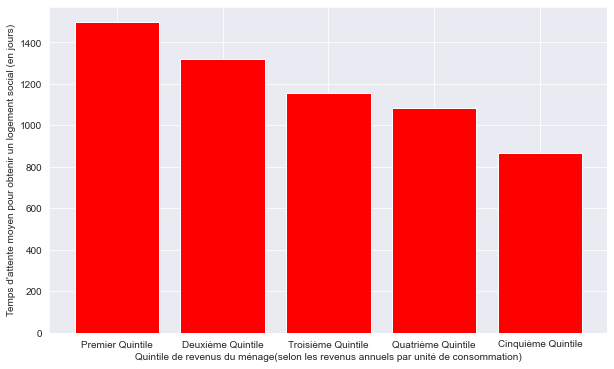

In [58]:
dfplot.reset_index(inplace=True)
fig = plt.figure(1, figsize=(10, 6))
plt.bar(dfplot["Quintile"], dfplot['Temps attente'], color="red")
plt.xlabel('Quintile de revenus du ménage(selon les revenus annuels par unité de consommation)')
plt.ylabel("Temps d'attente moyen pour obtenir un logement social (en jours)")

In [60]:
attente2=dfd1[[ "Age", "Temps attente"]]
dfplot2 = attente2.groupby('Age').mean()
dfplot2['Temps attente'] = dfplot2['Temps attente'].values.astype(np.int64)
dfplot2['Temps attente']=(dfplot2['Temps attente']//(86400000000000))

In [61]:
dfplot2.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Age du demandeur')

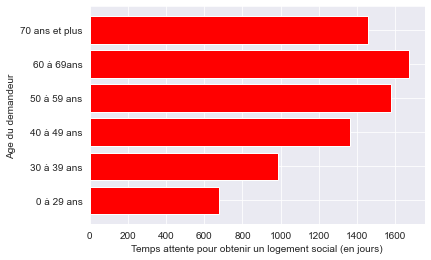

In [62]:
plt.barh(dfplot2["Age"], dfplot2['Temps attente'], color="red")
plt.xlabel("Temps attente pour obtenir un logement social (en jours)")
plt.ylabel('Age du demandeur')

In [63]:
attente3=dfd1[[ "Type du logement attribué", "Temps attente"]]
dfplot3 = attente3.groupby('Type du logement attribué').mean()
dfplot3['Temps attente'] = dfplot3['Temps attente'].values.astype(np.int64)
dfplot3['Temps attente']=(dfplot3['Temps attente']//(86400000000000))

KeyError: "['Type du logement attribué'] not in index"

In [54]:
dfplot3.reset_index(inplace=True)
fig = plt.figure(1, figsize=(5, 5))

<Figure size 360x360 with 0 Axes>

Text(0, 0.5, 'Type du logement attribué')

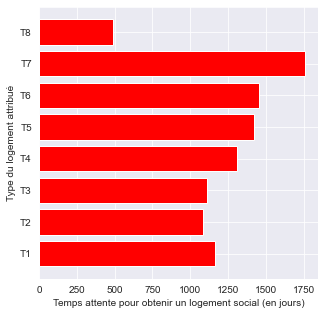

In [55]:
fig = plt.figure(1, figsize=(5, 5))
plt.barh(dfplot3["Type du logement attribué"], dfplot3['Temps attente'], color="red")
plt.xlabel("Temps attente pour obtenir un logement social (en jours)")
plt.ylabel('Type du logement attribué')

In [57]:
dfplot3

,Type du logement attribué,Temps attente
0,T1,1162
1,T2,1083
2,T3,1109
3,T4,1310
4,T5,1422
5,T6,1457
6,T7,1757
7,T8,490


Il faudrait réarranger le graph au niveau de la lisibilité. On pourrait aussi créer une fonction qui donne le graph en fonction d'une colonne en entrée (motif, quintile, sexe, tranches d'âge,....). Il faudrait pour cela au préalable avoir un dataframe nettoyé. Trier aussi par ordre croissant les motifs avec la commande sort.

Sur les motifs on a l'impression que c'est pour les motfis relatifs à des mobilités professionnelles, ou liés à des violences conjugales que le temps est moins loin (pour les gens qui ont une certane stabilité professionnelle, ou pour les cas d'extrême urgence). Je ne comprends pas trop ce que fait le "assistante maternelle" dans la liste.

## Automatisation